

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [2]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'
fourWeeksAgo = !date -d "4 week ago 13:00 " '+%Y-%m-%d'

beginDate = yesterday
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-22'] ['2016-12-21'] ['2016-12-16']
['2016-12-22']
'2016-12-22'


### get url

In [3]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'// graffiti

#  mission homeless https://data.sfgov.org/resource/7rca-bkvr.json
url = 'https://data.sfgov.org/resource/7rca-bkvr.csv'


# mission encampment   https://data.sfgov.org/resource/594p-sp4v.json
url2 = 'https://data.sfgov.org/resource/594p-sp4v.csv'

modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)

url2 = url2 + modify + operator + str(startdate)
print(url2)
print('url is concerns, url2 is encampments')


https://data.sfgov.org/resource/7rca-bkvr.csv?$where=opened>='2016-12-22'
https://data.sfgov.org/resource/594p-sp4v.csv?$where=opened>='2016-12-22'
url is concerns, url2 is encampments


In [4]:
df = pd.read_csv(url)

print (df.shape)
df2 = pd.read_csv(url2)
print (df2.shape)
df =  pd.concat([df,df2])
print (df.shape)

(4, 16)
(13, 16)
(17, 16)


## Set Display Column with wider so no problem with Media URL series

In [5]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [7]:
df.shape

(17, 16)

#### wow, 5 days > 1000 reports

In [8]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6654150,12/22/2016 02:57:44 PM,NaN,12/23/2016 02:04:24 AM,Open,closed,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of CLINTON PARK and STEVENSON ST,9,Mission,"(37.7693386881199, -122.42147026036)",Open311,NaN
1,6652572,12/22/2016 09:31:35 AM,12/22/2016 11:17:17 AM,12/22/2016 11:17:17 AM,Closed,"Case Resolved - Unknown CAD Disposition, Default to Resolved",Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"1926 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766466028069, -122.415616186119)",Open311,NaN
2,6652537,12/22/2016 09:23:51 AM,12/22/2016 11:18:29 AM,12/22/2016 11:18:29 AM,Closed,Case Resolved - Police Officer responded to request under CAD # 163571157. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"1930 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766396295578, -122.415609577723)",Open311,NaN


In [9]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [10]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6654150,2016-12-22 14:57:44,NaT,2016-12-23 02:04:24,Open,closed,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of CLINTON PARK and STEVENSON ST,9,Mission,"(37.7693386881199, -122.42147026036)",Open311,NaN
1,6652572,2016-12-22 09:31:35,2016-12-22 11:17:17,2016-12-22 11:17:17,Closed,"Case Resolved - Unknown CAD Disposition, Default to Resolved",Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"1926 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766466028069, -122.415616186119)",Open311,NaN
2,6652537,2016-12-22 09:23:51,2016-12-22 11:18:29,2016-12-22 11:18:29,Closed,Case Resolved - Police Officer responded to request under CAD # 163571157. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"1930 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766396295578, -122.415609577723)",Open311,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=22.0, right=22.0
  'left=%s, right=%s') % (left, right))


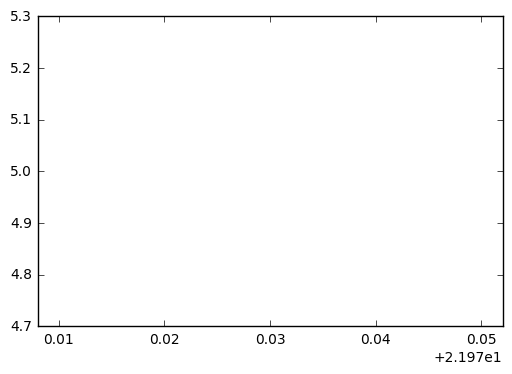

In [11]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=22.0, right=22.0
  'left=%s, right=%s') % (left, right))


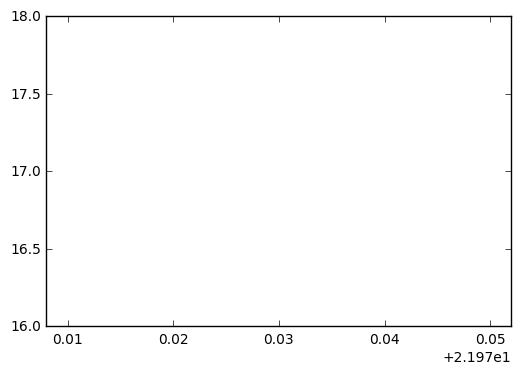

In [12]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))


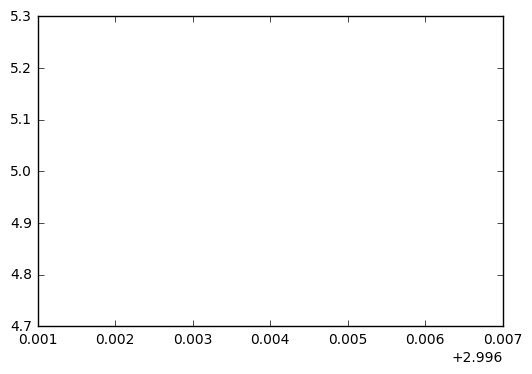

In [13]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [14]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [15]:

df['Request Details'].value_counts()


Encampment Cleanup                                               13
homeless_concerns - wellbeing_check - request_for_service         2
homeless_concerns - aggressive_behavior - request_for_service     2
Name: Request Details, dtype: int64

In [16]:
df['Supervisor District'].value_counts().sort_index()



9     16
10     1
Name: Supervisor District, dtype: int64

In [17]:
df.Neighborhood.value_counts()

Mission    17
Name: Neighborhood, dtype: int64

In [18]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6654150,2016-12-22 14:57:44,NaT,2016-12-23 02:04:24,Open,closed,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of CLINTON PARK and STEVENSON ST,9,Mission,"(37.7693386881199, -122.42147026036)",Open311,NaN
1,6652572,2016-12-22 09:31:35,2016-12-22 11:17:17,2016-12-22 11:17:17,Closed,"Case Resolved - Unknown CAD Disposition, Default to Resolved",Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"1926 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766466028069, -122.415616186119)",Open311,NaN
2,6652537,2016-12-22 09:23:51,2016-12-22 11:18:29,2016-12-22 11:18:29,Closed,Case Resolved - Police Officer responded to request under CAD # 163571157. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"1930 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766396295578, -122.415609577723)",Open311,NaN
3,6652296,2016-12-22 08:32:44,2016-12-22 15:37:05,2016-12-22 15:37:05,Closed,Case Resolved - Police Officer responded to request under CAD # 163571405. Issue was addressed.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of 24TH ST and MISSION ST,9,Mission,"(37.7522394710724, -122.418445426677)",Open311,NaN
0,6655031,2016-12-22 20:36:54,NaT,2016-12-22 21:08:00,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"54 SHOTWELL ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767593499113, -122.416744538846)",Open311,NaN
1,6654946,2016-12-22 19:37:39,NaT,2016-12-22 19:37:39,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of ENTERPRISE ST and FOLSOM ST,9,Mission,"(37.7647053193971, -122.415250771618)",Open311,NaN
2,6654934,2016-12-22 19:27:41,NaT,2016-12-22 19:27:41,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1455 15TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766737610945, -122.416803869036)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585c99a13da153f1b6e8943c/report.jpg
3,6654302,2016-12-22 15:32:26,NaT,2016-12-22 15:32:26,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 15TH ST and SHOTWELL ST,9,Mission,"(37.7668713217817, -122.416548520311)",Web Self Service,http://mobile311.sfgov.org/media/san_francisco/report/photos/585c627d3da153f1b6e88f8c/15th_and_Shotwell.JPG
4,6654246,2016-12-22 15:18:14,NaT,2016-12-22 16:18:59,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of TREAT AVE and 18TH ST,9,Mission,"(37.7621575749866, -122.414031841476)",Voice In,NaN
5,6653813,2016-12-22 13:39:15,NaT,2016-12-22 13:40:05,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 19TH ST and FOLSOM ST,9,Mission,"(37.7604987364894, -122.41484199114)",Voice In,NaN



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [129]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [126]:
#dfm = data frame mission
dfm = df[df['Supervisor District']==3]['Media URL']
dfm = dfm.reset_index(drop=True)
print(dfm[:])

Series([], Name: Media URL, dtype: object)


In [124]:
#df9 = data frame district 9, ronan
df9 = df[df['Supervisor District']==9]['Media URL']
df9 = df9.reset_index(drop=True)
print(ronan[:])


0                                                                                                                 NaN
1                                                                                                                 NaN
2                                                                                                                 NaN
3                                                                                                                 NaN
4                                                                                                                 NaN
5                                                                                                                 NaN
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585c99a13da153f1b6e8943c/report.jpg
7         http://mobile311.sfgov.org/media/san_francisco/report/photos/585c627d3da153f1b6e88f8c/15th_and_Shotwell.JPG
8                                                       

In [95]:
print(ronan[:])

Series([], Name: Media URL, dtype: object)


# The whole City

In [19]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585c99a13da153f1b6e8943c/report.jpg
1        http://mobile311.sfgov.org/media/san_francisco/report/photos/585c627d3da153f1b6e88f8c/15th_and_Shotwell.JPG
2                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585c2f6b3da153f1b6e887d3/report.jpg
3                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585c2d7c3da153f1b6e88741/report.jpg
4    http://mobile311.sfgov.org/media/san_francisco/report/photos/585bf9473da153f1b6e87bf3/photo_20161222_075900.jpg
5                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585bf2da3da153f1b6e87b03/report.jpg
Name: Media URL, dtype: object


In [20]:
len(images)

6

In [21]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/585c99a13da153f1b6e8943c/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/585c2f6b3da153f1b6e887d3/report.jpg


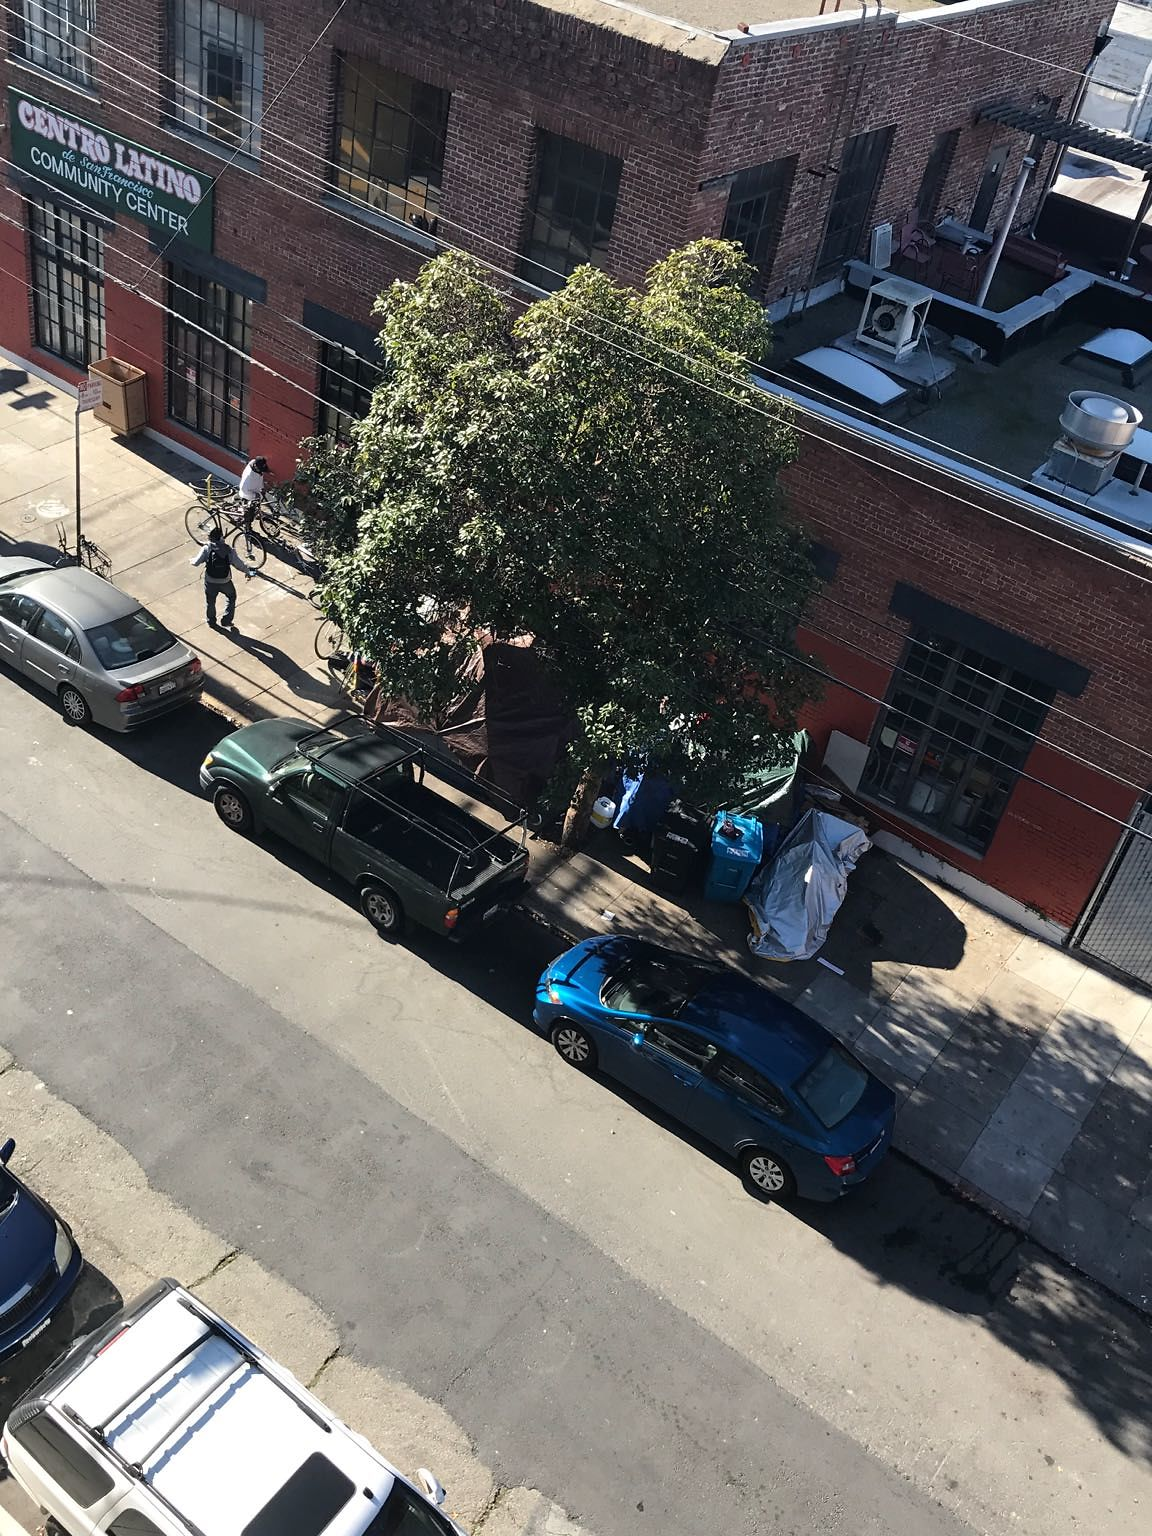

In [22]:
print(images[2])
Image(images[2])


In [23]:
!pwd

/home/gdillon/JupyterPractice/homeless_SF311


In [24]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [25]:
!yes| bash vidCreate.sh 

--2016-12-23 13:24:51--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585c99a13da153f1b6e8943c/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238496 (233K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 232.91K   998KB/s    in 0.2s    

2016-12-23 13:24:52 (998 KB/s) - 'report.jpg' saved [238496/238496]

--2016-12-23 13:24:52--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585c627d3da153f1b6e88f8c/15th_and_Shotwell.JPG
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 309913 (303K) [image/jpeg]
Saving to: '15th_and_Shotwell.JPG'

15th_and_Shotwell.J 100%[===================>] 302.65K  --.-KB/s    in 0.08s   

2016-12-23 13:24:52 (3.79 MB/s) - '15th_and_Shotwell.JPG' saved [309913/309

In [ ]:
!ls -la


In [103]:
df.to_csv('missionHomeless.csv')